In [1]:
#PART A DATA ENGINEERING
import pandas as pd

In [2]:
df_series = pd.read_csv(r'/Users/renataherrera/Desktop/Python individual /train_series.csv')

In [3]:
print(df_series)

          ID     MONTH  PAY  BILL_AMT  PAY_AMT
0      15936      JUNE  1.0       0.0    797.0
1      15936       MAY -1.0     797.0    190.0
2      15936     APRIL -1.0     190.0   3269.0
3      15936     MARCH -1.0    3260.0  32617.0
4      15936  FEBRUARY -1.0   32617.0   5000.0
...      ...       ...  ...       ...      ...
89995  19966       MAY  2.0   22083.0      5.0
89996  19966     APRIL  2.0   15444.0   1000.0
89997  19966     MARCH  0.0   13695.0   5000.0
89998  19966  FEBRUARY  0.0   17598.0   1000.0
89999  19966   JANUARY  0.0   17472.0    603.0

[90000 rows x 5 columns]


In [4]:
# Pivot the time-dependent columns (PAY, BILL_AMT, PAY_AMT) to build columns for each month
df_pivoted = df_series.pivot(index='ID', columns='MONTH', values=['PAY', 'BILL_AMT', 'PAY_AMT'])

In [5]:
print(df_pivoted)

        PAY                                  BILL_AMT                    \
MONTH APRIL FEBRUARY JANUARY JUNE MARCH  MAY    APRIL FEBRUARY  JANUARY   
ID                                                                        
0       0.0     -1.0     0.0 -1.0   0.0  0.0  13600.0  44024.0  18697.0   
1       0.0      0.0     0.0  0.0   0.0  0.0  53169.0  50372.0  49470.0   
3      -2.0     -2.0    -2.0 -2.0  -2.0 -2.0      0.0      0.0      0.0   
4       0.0      0.0     0.0  0.0   0.0  0.0   9044.0   9417.0   9617.0   
5       0.0      0.0     0.0  0.0   0.0  0.0  44412.0  35704.0  36524.0   
...     ...      ...     ...  ...   ...  ...      ...      ...      ...   
29993  -2.0     -2.0    -2.0 -2.0  -2.0 -2.0      0.0      0.0      0.0   
29996  -2.0      0.0    -1.0  1.0  -1.0 -2.0      0.0   2580.0   6941.0   
29997   0.0      0.0     0.0  0.0   0.0  0.0  46777.0   8824.0   9009.0   
29998   0.0      0.0     0.0  0.0   0.0  0.0  29435.0  29434.0  16565.0   
29999  -2.0     -2.0    -

In [6]:

df_pivoted.columns = [f'{col}_{month}' for col, month in df_pivoted.columns]

In [7]:
print(df_pivoted)

       PAY_APRIL  PAY_FEBRUARY  PAY_JANUARY  PAY_JUNE  PAY_MARCH  PAY_MAY  \
ID                                                                          
0            0.0          -1.0          0.0      -1.0        0.0      0.0   
1            0.0           0.0          0.0       0.0        0.0      0.0   
3           -2.0          -2.0         -2.0      -2.0       -2.0     -2.0   
4            0.0           0.0          0.0       0.0        0.0      0.0   
5            0.0           0.0          0.0       0.0        0.0      0.0   
...          ...           ...          ...       ...        ...      ...   
29993       -2.0          -2.0         -2.0      -2.0       -2.0     -2.0   
29996       -2.0           0.0         -1.0       1.0       -1.0     -2.0   
29997        0.0           0.0          0.0       0.0        0.0      0.0   
29998        0.0           0.0          0.0       0.0        0.0      0.0   
29999       -2.0          -2.0         -2.0      -2.0       -2.0     -2.0   

In [8]:
# Reset the index to get 'ID' as a separate column
df_pivoted.reset_index(inplace=True)

In [9]:
print(df_pivoted)

          ID  PAY_APRIL  PAY_FEBRUARY  PAY_JANUARY  PAY_JUNE  PAY_MARCH  \
0          0        0.0          -1.0          0.0      -1.0        0.0   
1          1        0.0           0.0          0.0       0.0        0.0   
2          3       -2.0          -2.0         -2.0      -2.0       -2.0   
3          4        0.0           0.0          0.0       0.0        0.0   
4          5        0.0           0.0          0.0       0.0        0.0   
...      ...        ...           ...          ...       ...        ...   
14995  29993       -2.0          -2.0         -2.0      -2.0       -2.0   
14996  29996       -2.0           0.0         -1.0       1.0       -1.0   
14997  29997        0.0           0.0          0.0       0.0        0.0   
14998  29998        0.0           0.0          0.0       0.0        0.0   
14999  29999       -2.0          -2.0         -2.0      -2.0       -2.0   

       PAY_MAY  BILL_AMT_APRIL  BILL_AMT_FEBRUARY  BILL_AMT_JANUARY  \
0          0.0         13600

In [10]:
# Load the "train_customers.csv" file into a DataFrame
df_customers = pd.read_csv(r'/Users/renataherrera/Desktop/Python individual /train_customers.csv')

In [11]:
# Merge the two DataFrames on the 'ID' column
df_customers = pd.merge(df_customers, df_pivoted, on='ID', how='inner')

In [12]:
print (df_customers)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_APRIL  \
0      15936   140000.0    2          1         1   39       -1.0   
1      15248    90000.0    2          2         1   49       -2.0   
2      27163   150000.0    2          1         1   37       -1.0   
3      13955   160000.0    1          3         1   38        0.0   
4      23604   360000.0    1          2         1   28        2.0   
...      ...        ...  ...        ...       ...  ...        ...   
14995  28636   330000.0    2          1         2   33       -2.0   
14996  17730    50000.0    1          2         2   49        0.0   
14997  28030   410000.0    1          1         2   32       -1.0   
14998  15725   200000.0    1          1         1   40       -2.0   
14999  19966    60000.0    1          2         2   25        2.0   

       PAY_FEBRUARY  PAY_JANUARY  PAY_JUNE  ...  BILL_AMT_JANUARY  \
0              -1.0          0.0       1.0  ...           20506.0   
1              -1.0         -1.0 

In [13]:
# Load the "train_target.csv" file into a DataFrame
df_target = pd.read_csv(r'/Users/renataherrera/Desktop/Python individual /train_target.csv')

In [17]:
df_customersmerge = pd.merge(df_customers, df_target, on='ID', how='inner')

In [18]:
print(df_customersmerge)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_APRIL  \
0      15936   140000.0    2          1         1   39       -1.0   
1      15248    90000.0    2          2         1   49       -2.0   
2      27163   150000.0    2          1         1   37       -1.0   
3      13955   160000.0    1          3         1   38        0.0   
4      23604   360000.0    1          2         1   28        2.0   
...      ...        ...  ...        ...       ...  ...        ...   
14995  28636   330000.0    2          1         2   33       -2.0   
14996  17730    50000.0    1          2         2   49        0.0   
14997  28030   410000.0    1          1         2   32       -1.0   
14998  15725   200000.0    1          1         1   40       -2.0   
14999  19966    60000.0    1          2         2   25        2.0   

       PAY_FEBRUARY  PAY_JANUARY  PAY_JUNE  ...  BILL_AMT_JUNE  \
0              -1.0          0.0       1.0  ...            0.0   
1              -1.0         -1.0       

In [19]:
# Define the file path where you want to save the CSV file
output_file = r'/Users/renataherrera/Desktop/DeAlbaRegina_A_train.csv'


In [20]:
# Use the to_csv method to export the DataFrame to a CSV file
df_customersmerge.to_csv(output_file,index=False)

In [21]:
#PART B EXPLORATORY DATA ANALYSIS 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
defaulters_count=df_customersmerge.groupby("EDUCATION")["DEFAULT_JULY"].sum()

defaulters_count

EDUCATION
0       0
1    1013
2    1683
3     630
4       5
5       8
6       2
Name: DEFAULT_JULY, dtype: int64

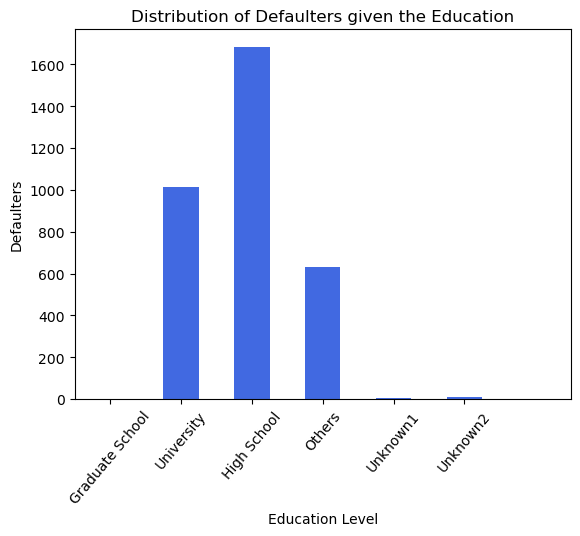

In [23]:
defaulters_count.plot(kind='bar', color='royalblue')
plt.xlabel('Education Level')
plt.ylabel('Defaulters')
plt.title('Distribution of Defaulters given the Education')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Graduate School', 'University', 'High School', 'Others', 'Unknown1', 'Unknown2'], rotation=50)
plt.show()

We can observe in this bar chart that individuals with highschool educational level are more likely to default. This might be because income of people with a high school education may, on average, earn lower incomes compared to those with higher levels of education, also they may have accumulated student loans or other debts related to education. Important to consider that without a college education, individuals may have fewer opportunities to learn about financial management, budgeting, and responsible credit use. Since the difference of defaults regarding the education level is big, the bank should give this a lot of consideration before giving a loan. 

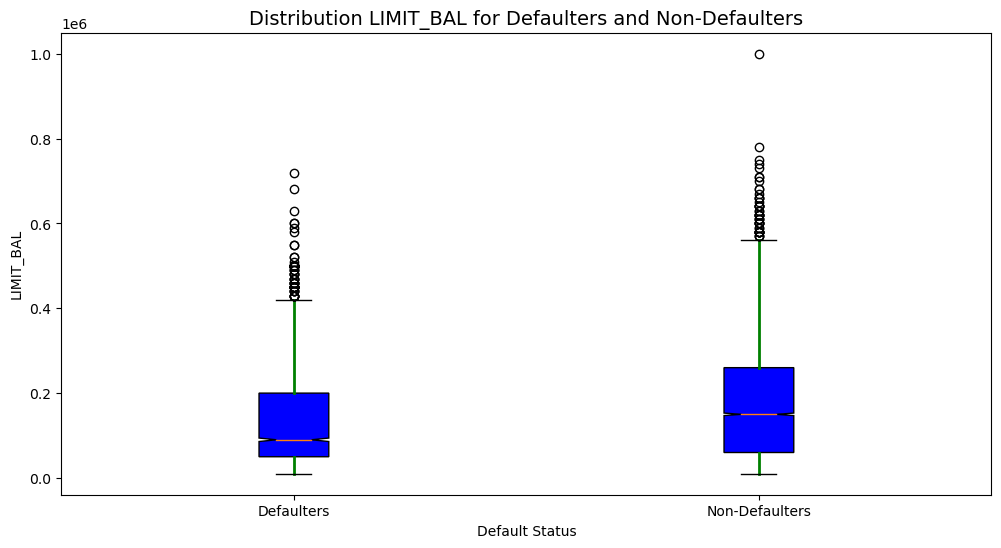

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

#DataFrame 
data_df = df_customersmerge

plt.figure(figsize=(12, 6))
limit_bal_default = data_df.loc[data_df['DEFAULT_JULY'] == 1]['LIMIT_BAL']
limit_bal_nondefault = data_df.loc[data_df['DEFAULT_JULY'] == 0]['LIMIT_BAL']

# Get a color 
box_color = 'blue'  

box = plt.boxplot([limit_bal_default, limit_bal_nondefault], notch=True, patch_artist=True,
                   boxprops=dict(facecolor=box_color), whiskerprops=dict(color="green", linewidth=2))

plt.title('Distribution LIMIT_BAL for Defaulters and Non-Defaulters', fontsize=14) 
plt.xticks([1, 2], ['Defaulters', 'Non-Defaulters'])
plt.xlabel('Default Status')
plt.ylabel('LIMIT_BAL')

plt.show()


In this box plot we can observe that non defaulters have higher credit limit, which is good for the bank in order to have lower risks, but still there are many defaulters with high limit so the bank should lower this in order to avoid losing money. 

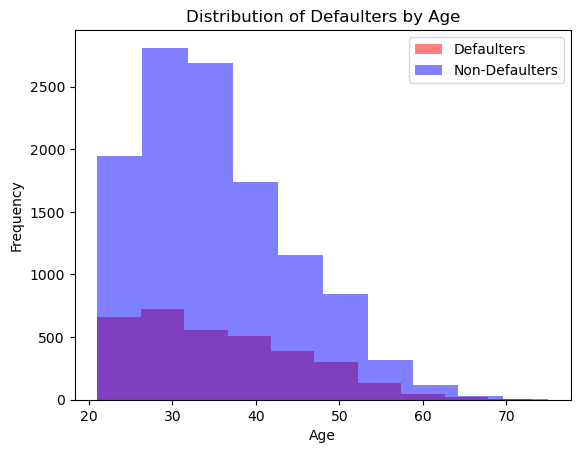

In [26]:
#3 more insights
import pandas as pd
import matplotlib.pyplot as plt

#DataFrame 
data_df = df_customersmerge

# Filter data for defaulters and non-defaulters
defaulters_age = data_df.loc[data_df['DEFAULT_JULY'] == 1]['AGE']
nondefaulters_age = data_df.loc[data_df['DEFAULT_JULY'] == 0]['AGE']

# Create a histogram for defaulters
plt.hist(defaulters_age, bins=10, alpha=0.5, label='Defaulters', color='red')

# Create a histogram for non-defaulters
plt.hist(nondefaulters_age, bins=10, alpha=0.5, label='Non-Defaulters', color='blue')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Defaulters by Age')
plt.legend()

# Show the plot
plt.show()




In this histogram we can observe that people between the ages 20´s-30´s are more likely to default being 26-27 the peak of default. We can infer this happens because people in this age group have a limited credit history, not very high income level, many life changes and also many people of that age are still finishing paying off their education loans. 
Having this in mind, as a bank we should get a broader range of information for people in this age group, like income, employment history, credit history, and debt-to-income ratio before giving the loans. 
Also, we can observe that people older than 50 are not very likely to ask for loans,this can be because of the financial stability, retirement and reduced expenses at that age. 

In [27]:
defaulters_count=df_customersmerge.groupby("SEX")["DEFAULT_JULY"].sum()

defaulters_count

SEX
1    1446
2    1895
Name: DEFAULT_JULY, dtype: int64

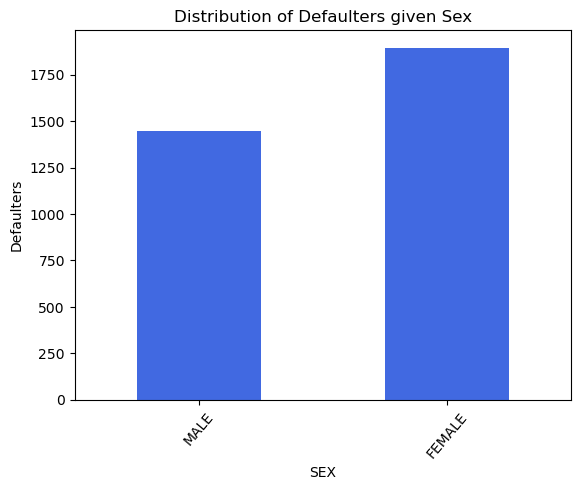

In [28]:
defaulters_count.plot(kind='bar', color='royalblue')
plt.xlabel('SEX')
plt.ylabel('Defaulters')
plt.title('Distribution of Defaulters given Sex')
plt.xticks(ticks=[0,1], labels=['MALE', 'FEMALE'], rotation=50)
plt.show()

   In this bar chart we can observe that females are more likely to default than men, this is probably because of the disparities on income between men and women, women are more likely to be in less stable jobs and another important factor to consider is that women tend to have more family responsabilities which doesn´t let them work as much time as men. It's important to emphasize that these factors are complex, and individual circumstances can vary widely. Not all females face a higher risk of default, and the observed trend may be more pronounced in a specific region.

In [29]:
defaulters_count=df_customersmerge.groupby("MARRIAGE")["DEFAULT_JULY"].sum()

defaulters_count

MARRIAGE
0       3
1    1607
2    1690
3      41
Name: DEFAULT_JULY, dtype: int64

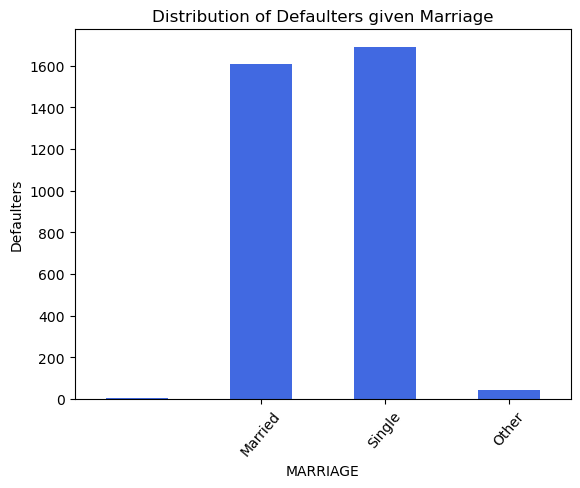

In [30]:
defaulters_count.plot(kind='bar', color='royalblue')
plt.xlabel('MARRIAGE')
plt.ylabel('Defaulters')
plt.title('Distribution of Defaulters given Marriage')
plt.xticks(ticks=[1,2,3], labels=['Married', 'Single', 'Other'], rotation=50)
plt.show()

In this chart we can observe that single people are more likely to default, but the difference is not very big. This might be because single people are less responsible than married people, also married people have double income which makes it easier to pay off bills, also singles may experience significant life events, such as job loss, health issues, or unexpected expenses, without the financial support and sharing of responsibilities that marriage can provide.

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df_1 = pd.read_csv('DeAlbaRegina_A_train.csv')
df_2 = pd.read_csv('test_data.csv')
# Concatenate the two DataFrames vertically
data_train = pd.concat([df_1, df_2], ignore_index=True)
data_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_APRIL',
       'PAY_FEBRUARY', 'PAY_JANUARY', 'PAY_JUNE', 'PAY_MARCH', 'PAY_MAY',
       'BILL_AMT_APRIL', 'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY',
       'BILL_AMT_JUNE', 'BILL_AMT_MARCH', 'BILL_AMT_MAY', 'PAY_AMT_APRIL',
       'PAY_AMT_FEBRUARY', 'PAY_AMT_JANUARY', 'PAY_AMT_JUNE', 'PAY_AMT_MARCH',
       'PAY_AMT_MAY', 'DEFAULT_JULY'],
      dtype='object')

In [32]:
y = data_train.DEFAULT_JULY #target variable
features = ['EDUCATION', 'AGE','LIMIT_BAL','PAY_JUNE',
       'PAY_MAY', 'PAY_APRIL', 'PAY_MARCH', 'PAY_FEBRUARY', 'PAY_JANUARY','SEX','MARRIAGE','PAY_AMT_JUNE',
       'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'PAY_AMT_MARCH', 'PAY_AMT_FEBRUARY', 'PAY_AMT_JANUARY','BILL_AMT_APRIL', 'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY',
       'BILL_AMT_JUNE', 'BILL_AMT_MARCH', 'BILL_AMT_MAY']
X= data_train[features]
X.describe()

,EDUCATION,AGE,LIMIT_BAL,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,PAY_FEBRUARY,PAY_JANUARY,SEX,...,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY
count,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,...,23000.000000,23000.000000,23000.000000,23000.000000,2.300000e+04,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000
mean,1.852391,35.437348,167671.725217,-0.017348,-0.137609,-0.169913,-0.222435,-0.270217,-0.291130,1.603652,...,5238.521348,4832.126522,4838.027609,5198.220174,4.680253e+04,40110.557522,38716.866522,50963.903870,43063.166217,48936.677913
std,0.789124,9.184193,129825.915195,1.126235,1.199582,1.197342,1.167707,1.129503,1.149062,0.489149,...,17897.748058,15889.440659,15379.331225,17830.911599,6.913281e+04,60207.838276,59016.133255,73212.215689,63695.588306,70651.991959
min,0.000000,21.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-1.572640e+05,-81334.000000,-339603.000000,-165580.000000,-170000.000000,-30000.000000
25%,1.000000,28.000000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,390.000000,296.000000,256.000000,129.750000,2.644500e+03,1758.500000,1280.000000,3471.500000,2359.250000,2945.500000
50%,2.000000,34.000000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1804.000000,1500.000000,1502.000000,1500.000000,2.018400e+04,18183.000000,17177.000000,22330.000000,19115.500000,21400.000000
75%,2.000000,41.000000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,4545.250000,4000.000000,4071.250000,4000.000000,6.006300e+04,50337.750000,49107.750000,66966.500000,54599.500000,63827.250000
max,6.000000,79.000000,1000000.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,2.000000,...,896040.000000,621000.000000,417990.000000,528666.000000,1.664089e+06,927171.000000,961664.000000,964511.000000,891586.000000,983931.000000


In [33]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


model = RandomForestClassifier(n_estimators=150) #number of decision trees, large data sets more trees


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust the values as needed
    'max_depth': [None, 10, 20, 30],  # Adjust the values as needed, to limit the depth of each tree and avoid overfitting
    'min_samples_split': [2, 5, 10],  # Adjust the values as needed,sets the threshold for deciding when to make a further division in the tree structure
    'min_samples_leaf': [1, 2, 4]  # Adjust the values as needed,threshold for determining when a node should be a terminal leaf rather than splitting it further
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose=2)
#cv=5 data will be split into 5 folds, large datasets small, small datasets big 5 or 10
#n_jobs=-1 to use all CPU
#verbose2=detailed output


# Fit the model to the training data
grid_search.fit(X, y) #x features, y target, default

# Get the best hyperparameters and model
best_params = grid_search.best_params_ #stores a dictionary containing the best hyperparameter values found by the grid search
best_model = grid_search.best_estimator_ #stores the best machine learning model with the optimal hyperparameters

# Make predictions using the best model
y_pred = best_model.predict(X)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred) #accuracy comparing y target with y predicted target

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", accuracy)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy on Test Data: 0.8551304347826088


In [34]:
print("Best AUC:", {roc_auc_score(y, best_model.predict_proba(X)[:,1])}) #for binary classification

Best AUC: {0.8584379685046596}


In [35]:
submission_data = pd.read_csv('submission_features.csv')
submission_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
0,3644,130000.0,2,1,1,46,0,0,0,0,...,18932.0,22001.0,3403.0,3859.0,1593.0,3000.0,4000.0,0.0,3860.0,249.0
1,15370,120000.0,2,5,1,57,0,0,0,0,...,98109.0,74387.0,75237.0,78967.0,5000.0,5007.0,5000.0,5000.0,5000.0,5000.0
2,15570,500000.0,1,1,1,55,3,2,2,2,...,4957.0,4957.0,4957.0,4957.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16113,60000.0,1,2,2,28,2,2,2,0,...,59892.0,60228.0,57969.0,55220.0,2800.0,0.0,3000.0,3000.0,3000.0,23000.0
4,14220,220000.0,2,1,2,36,0,0,2,0,...,1522.0,5198.0,3974.0,-38.0,2190.0,1.0,3980.0,20.0,0.0,7762.0


In [36]:
X_test = submission_data[features]
X_test.describe() #to make the model make predictions in the submissions data set

,EDUCATION,AGE,LIMIT_BAL,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,PAY_FEBRUARY,PAY_JANUARY,SEX,...,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1.855571,35.643714,166868.571429,-0.014571,-0.121143,-0.154000,-0.214857,-0.253000,-0.291000,1.604000,...,5183.493429,4806.199429,4672.427714,5272.287571,47705.203286,40971.315143,39380.697429,52075.734000,43919.378000,49975.523286
std,0.794410,9.326724,129497.561314,1.115844,1.189279,1.195313,1.173897,1.145192,1.153105,0.489099,...,16616.889397,14910.078661,14941.934537,17601.861000,70056.788481,62694.361120,61290.045615,75009.973599,66384.097721,72861.328848
min,0.000000,21.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-15641.000000,-61372.000000,-209051.000000,-15308.000000,-15000.000000,-69777.000000
25%,1.000000,28.000000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,390.000000,297.750000,243.750000,99.000000,2755.500000,1792.750000,1117.750000,3814.000000,2251.250000,3087.250000
50%,2.000000,34.000000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1800.000000,1500.000000,1500.000000,1500.000000,19832.000000,17821.500000,16655.000000,22626.000000,18841.500000,20617.000000
75%,2.000000,42.000000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,4500.000000,4138.000000,4000.000000,4012.250000,60186.250000,49723.500000,49401.500000,67622.750000,54096.250000,64346.250000
max,6.000000,75.000000,780000.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,2.000000,...,508229.000000,320008.000000,426529.000000,527143.000000,559712.000000,516139.000000,527711.000000,626648.000000,628699.000000,586825.000000


In [37]:
# Get probability estimates 
probability = best_model.predict_proba(X_test)[:, 1]
print(probability)

[0.10665705 0.09051057 0.89876176 ... 0.12797661 0.11181409 0.25157083]


In [38]:
# Create a DataFrame with 'ID' and 'Prediction' columns
result_df = pd.DataFrame({'ID': submission_data['ID'], 'DEFAULT_JULY': probability})
result_df.head()

,ID,DEFAULT_JULY
0,3644,0.106657
1,15370,0.090511
2,15570,0.898762
3,16113,0.652251
4,14220,0.208267


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  13.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   9.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  13.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimat

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  13.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  13.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=  13.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  13.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=  13.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_esti

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  13.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=  13.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimat

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  13.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  12.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=  14.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  14.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   8.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_esti